## Kaggle Bike sharing demand forecasting competition
### Approach using Autogluon modelling
https://www.kaggle.com/competitions/bike-sharing-demand

## 1. Load Competition data

In [76]:
import pandas as pd

In [77]:
# load train df
df_train = pd.read_csv("train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [78]:
# visualise first 10 rows
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [79]:
# Assuming your column is already datetime type
df_train["datetime"] = pd.to_datetime(df_train["datetime"])

start = df_train["datetime"].min()
end = df_train["datetime"].max()

print("Start:", start)
print("End:", end)

Start: 2011-01-01 00:00:00
End: 2012-12-19 23:00:00


In [80]:
# load test df
df_test = pd.read_csv("test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [81]:
# drop casual,registered columns as missing from test dataset
df_train.drop(columns=["casual","registered"], inplace=True)

## 2. Submission A: baseline model on raw data


In [82]:
from autogluon.tabular import TabularPredictor

In [83]:
predictor = TabularPredictor(label="count", path = f"AutogluonModels/agmodelA").fit(
    train_data=df_train,
    time_limit=60,
    presets="best_quality"
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       7.85 GB / 31.67 GB (24.8%)
Disk Space Avail:   474.68 GB / 951.65 GB (49.9%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is use

### Review AutoGluon's training run with ranking of models that did the best.

In [84]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val              eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -132.771965  root_mean_squared_error       1.849518  6.921743                0.000000           0.015786            3       True          3
1  WeightedEnsemble_L2 -132.771965  root_mean_squared_error       1.849518  6.911601                0.000000           0.005645            2       True          2
2    LightGBMXT_BAG_L1 -132.771965  root_mean_squared_error       1.849518  6.905956                1.849518           6.905956            1       True          1
Number of models trained: 3
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', [])               

c:\Users\Valerio Pellicciari\OneDrive - Mathwall Technologies Ltd\Desktop\Offline_Code\00_Personal\07_aws_mle_nano\bike_demand_prediction\.venv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-132.7719652111161),
  'WeightedEnsemble_L2': np.float64(-132.7719652111161),
  'WeightedEnsemble_L3': np.float64(-132.7719652111161)},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBMXT_BAG_L1': 6.905956268310547,
  'WeightedEnsemble_L2': 0.005644559860229492,
  'WeightedEnsemble_L3': 0.015786409378051758},
 'model_pred_times': {'LightGBMXT_BAG_L1': 1.849517822265625,
  'WeightedEnsemble_L2': 0.0,
  'WeightedEnsemble_L3': 0.0},
 'num_bag_folds': 8,
 'max_stack_level': 3,
 'model_hyperparams': {'LightGBMXT_BAG_L1': {'use_orig_features': True,
   'valid_stacker': True,
   'max_base_models':

In [85]:
# make predictions on test dataset
predictions = predictor.predict(df_test)
predictions.head()

0    83.307968
1    70.861984
2    70.861984
3    85.092392
4    85.092392
Name: count, dtype: float32

In [86]:
#### NOTE: Kaggle will reject the submission if it contains negative numbers - we need to set everything to be > 0

# how many negative predictions?
print(f"number of negative predictions: {len(predictions[predictions<0])}")

# replace with zeros
predictions[predictions<0] = 0

number of negative predictions: 162


### Set predictions to submission dataframe, save, and submit

In [87]:
submission = pd.DataFrame({"datetime":df_test["datetime"]})
submission["count"] = predictions
submission.to_csv("submissions/submission_a.csv", index=False)

## 3. Run EDA

### Process
- a Transformation
- b Missing Data
- c Anomalous data
- d Correlation analysis
- e Feature Engineering

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
## Transformation: parse datetime into day and hour
df_train["datetime"] = pd.to_datetime(df_train["datetime"])
df_train["day"] = df_train["datetime"].dt.date
df_train["hour"] = df_train["datetime"].dt.hour
df_test["datetime"] = pd.to_datetime(df_test["datetime"])
df_test["day"] = df_test["datetime"].dt.date
df_test["hour"] = df_test["datetime"].dt.hour

# store test datetime for submission
submission = pd.DataFrame({'datetime': df_test["datetime"]})

# datetime after refitting to dataset
df_train.drop(columns=["datetime"], inplace=True)
df_test.drop(columns=["datetime"], inplace=True)


In [90]:
## Transformation: set categorical variables to pandas type category
num_cols = ['temp', 'atemp','humidity', 'windspeed']
cat_cols = ["season", "holiday", "workingday", "weather"]
datete_cols = ["day", "hour"]
target_col = ["count"]
df_train[cat_cols] = df_train[cat_cols].astype("category")
df_test[cat_cols] = df_test[cat_cols].astype("category")

In [91]:
## Missing data - no missing data found
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  category
 2   workingday  10886 non-null  category
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   count       10886 non-null  int64   
 9   day         10886 non-null  object  
 10  hour        10886 non-null  int32   
dtypes: category(4), float64(3), int32(1), int64(2), object(1)
memory usage: 596.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      6493 non-null   category
 1   holiday     649

In [92]:
## explore continuous variables
print(df_train.describe())
print("\n------------------------------\n")
print(df_test.describe())

              temp         atemp      humidity     windspeed         count  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395    191.574132   
std        7.79159      8.474601     19.245033      8.164537    181.144454   
min        0.82000      0.760000      0.000000      0.000000      1.000000   
25%       13.94000     16.665000     47.000000      7.001500     42.000000   
50%       20.50000     24.240000     62.000000     12.998000    145.000000   
75%       26.24000     31.060000     77.000000     16.997900    284.000000   
max       41.00000     45.455000    100.000000     56.996900    977.000000   

               hour  
count  10886.000000  
mean      11.541613  
std        6.915838  
min        0.000000  
25%        6.000000  
50%       12.000000  
75%       18.000000  
max       23.000000  

------------------------------

              temp        atemp     humidity    windspeed         

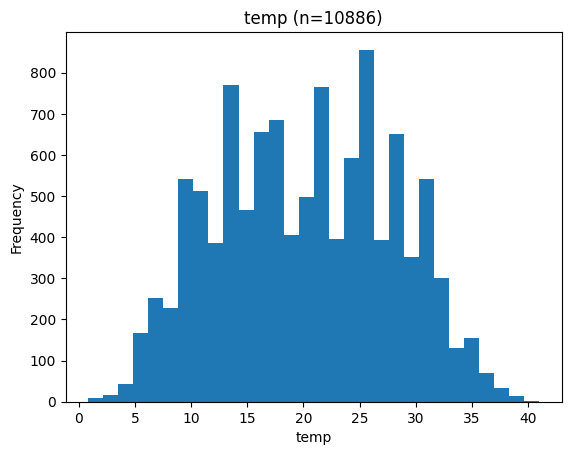

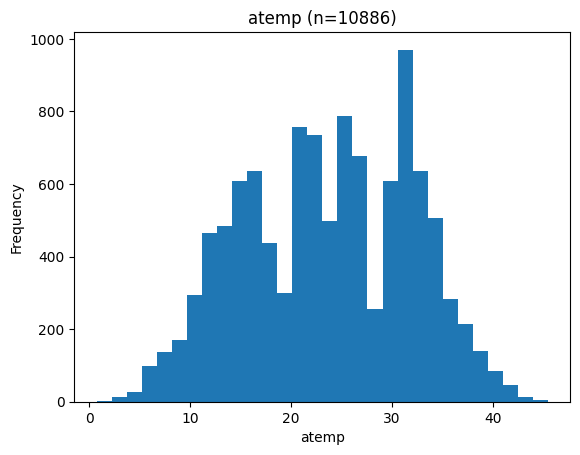

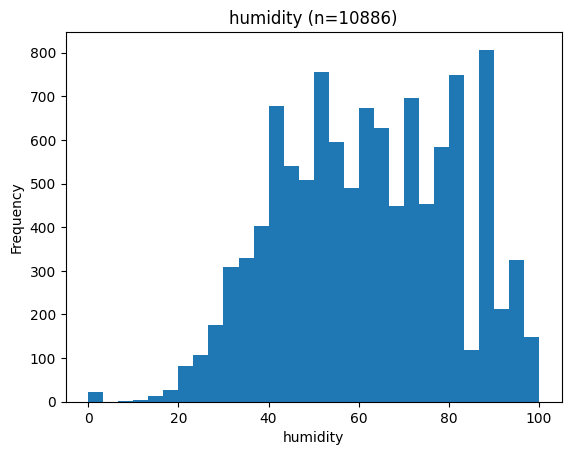

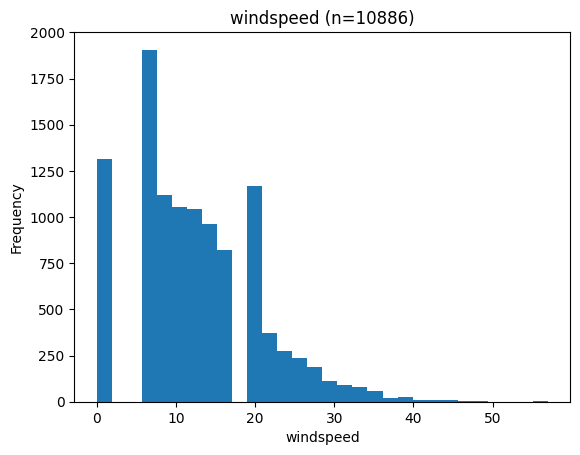

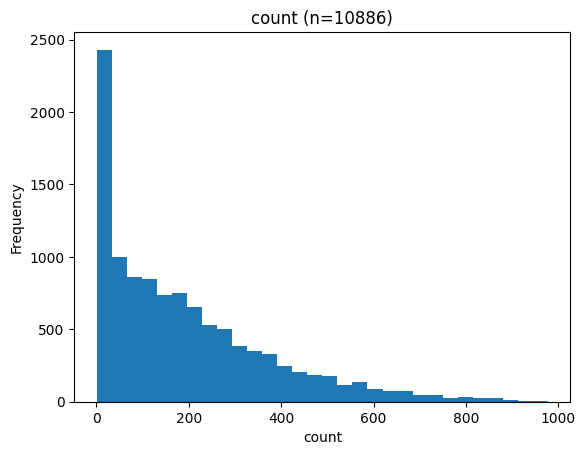

In [93]:
# outliers: no apparent outliers seen
for col in (num_cols + target_col):
    s = df_train[col].dropna()
    plt.figure()
    plt.hist(s, bins=30)
    plt.title(f'{col} (n={len(s)})')
    plt.xlabel(col); plt.ylabel('Frequency')
    plt.show()

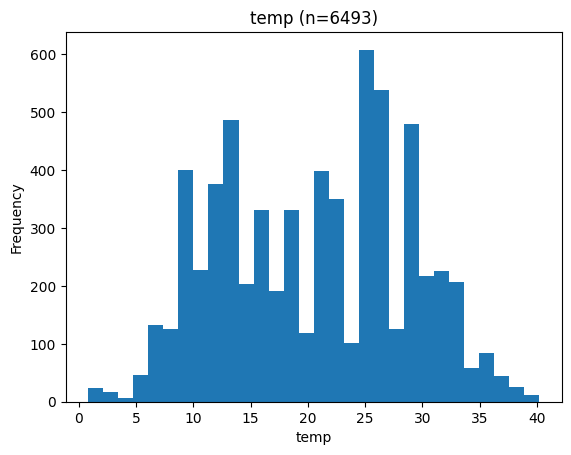

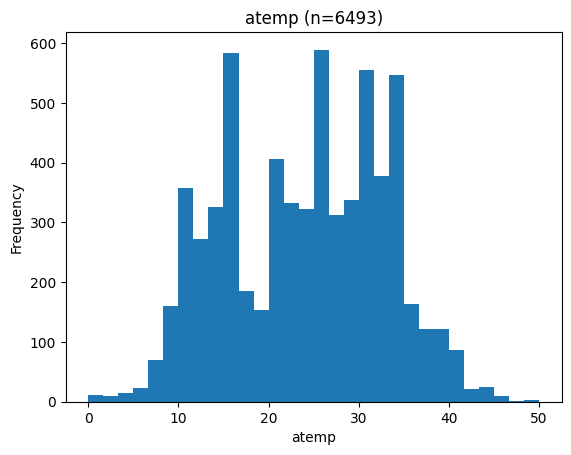

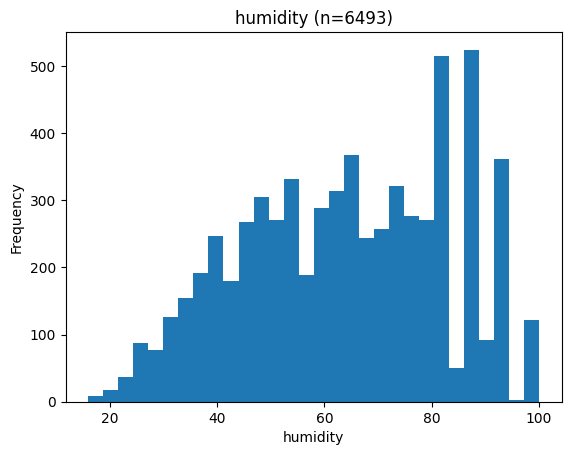

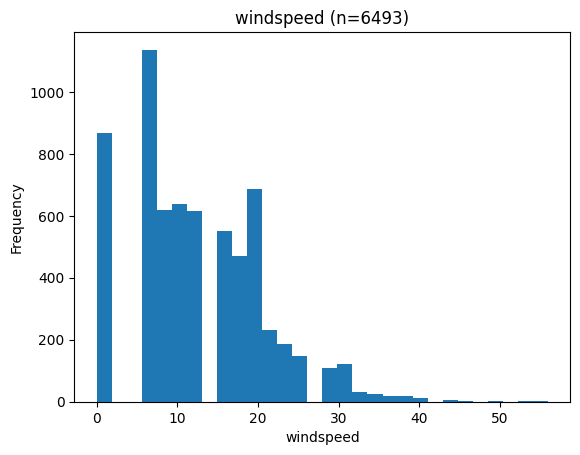

In [94]:
# outliers: no apparent outliers seen
for col in num_cols:
    s = df_test[col].dropna()
    plt.figure()
    plt.hist(s, bins=30)
    plt.title(f'{col} (n={len(s)})')
    plt.xlabel(col); plt.ylabel('Frequency')
    plt.show()

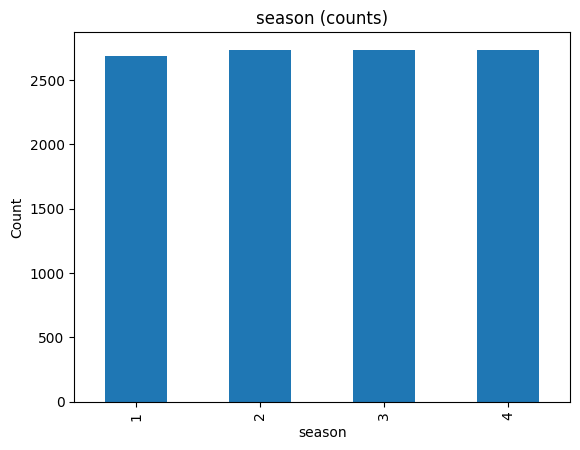

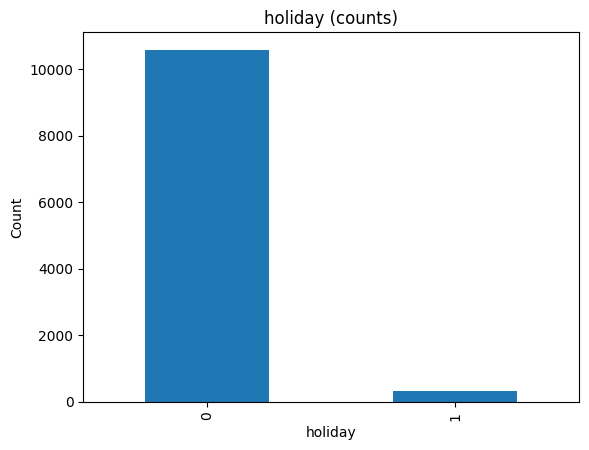

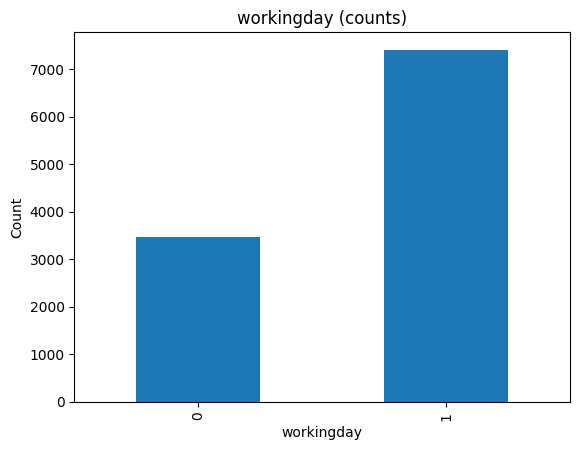

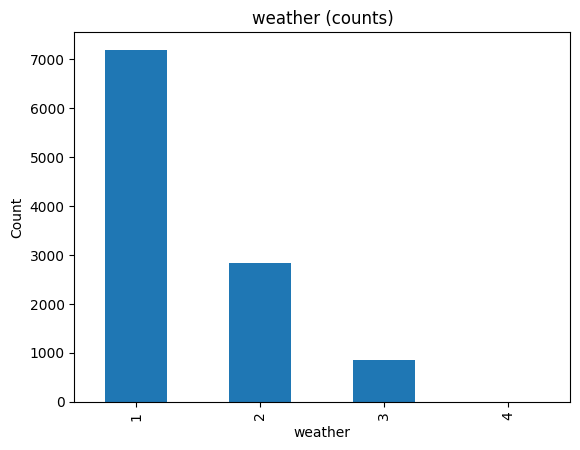

In [95]:
# outliers: no apparent outliers seen
for col in cat_cols:
    counts = df_train[col].astype('category').value_counts(dropna=False).sort_index()
    plt.figure()
    counts.plot(kind='bar')
    plt.title(f'{col} (counts)')
    plt.ylabel('Count'); plt.xlabel(col)
    plt.show()

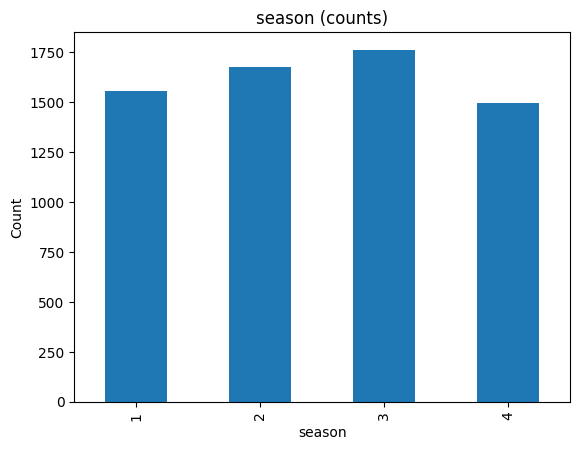

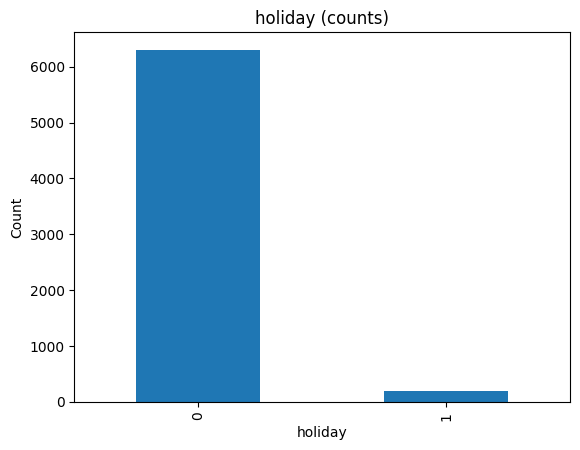

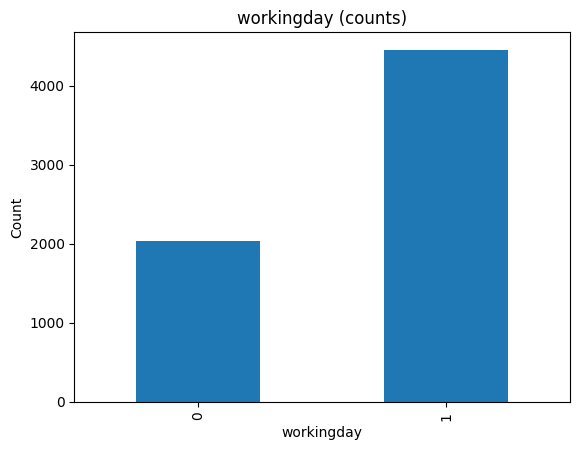

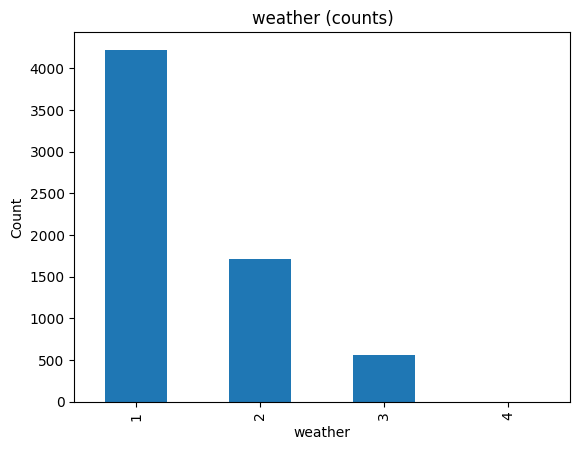

In [96]:
# outliers: no apparent outliers seen
for col in cat_cols:
    counts = df_test[col].astype('category').value_counts(dropna=False).sort_index()
    plt.figure()
    counts.plot(kind='bar')
    plt.title(f'{col} (counts)')
    plt.ylabel('Count'); plt.xlabel(col)
    plt.show()

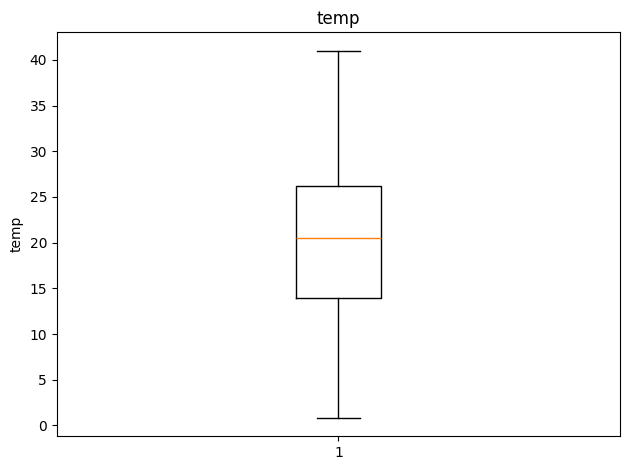

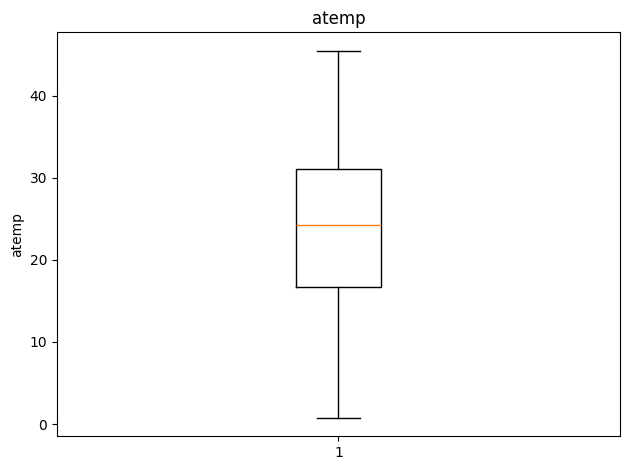

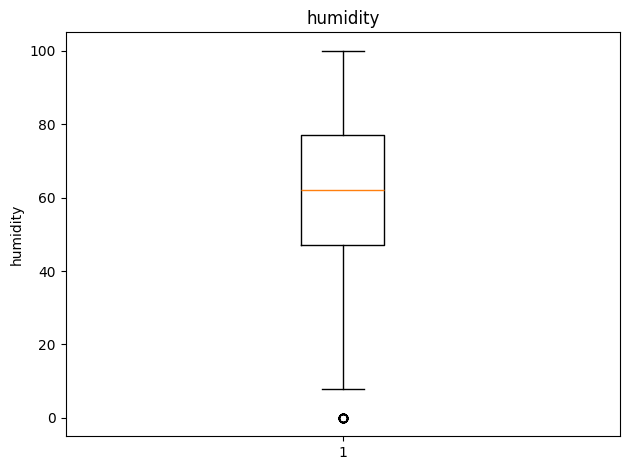

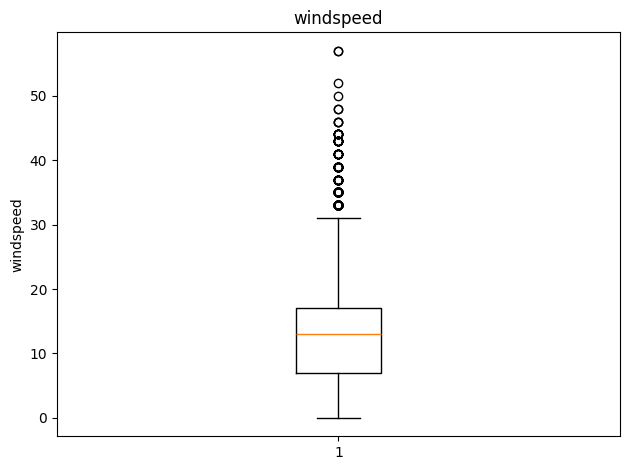

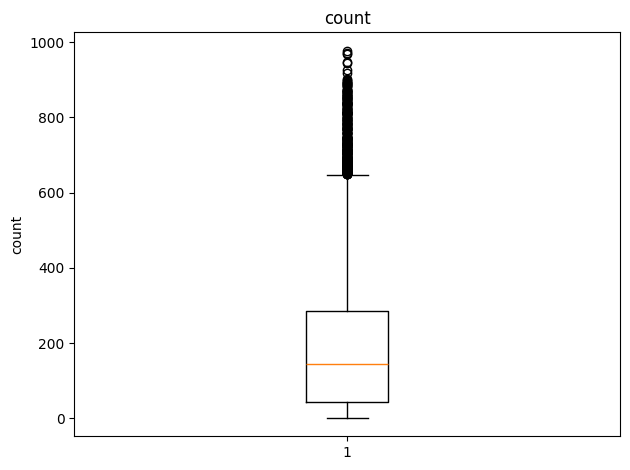

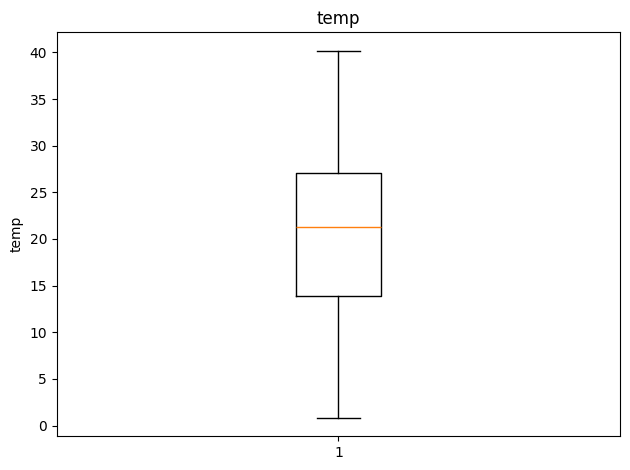

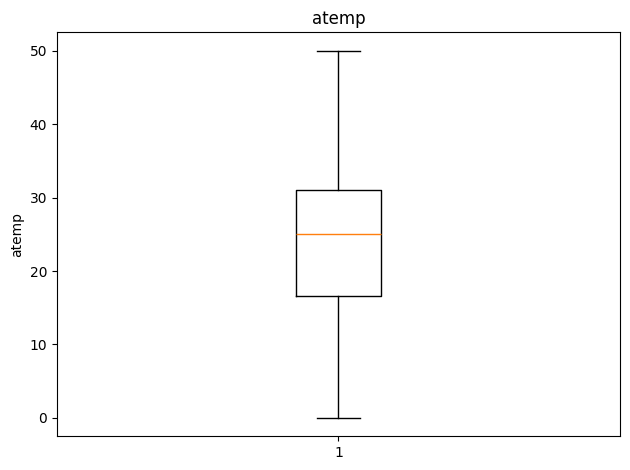

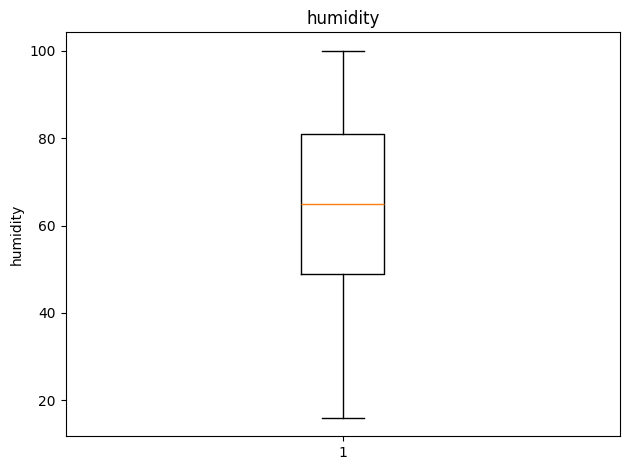

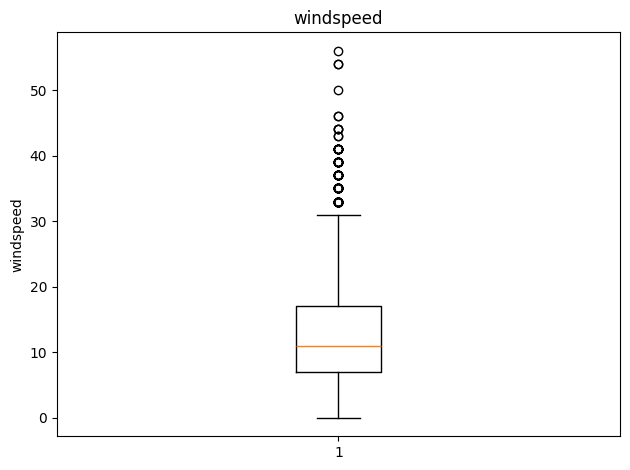

In [97]:
# outliers: no apparent outliers seen
for col in num_cols + target_col:
    plt.figure()
    plt.boxplot(df_train[col].dropna())
    plt.title(col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

for col in num_cols:
    plt.figure()
    plt.boxplot(df_test[col].dropna())
    plt.title(col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

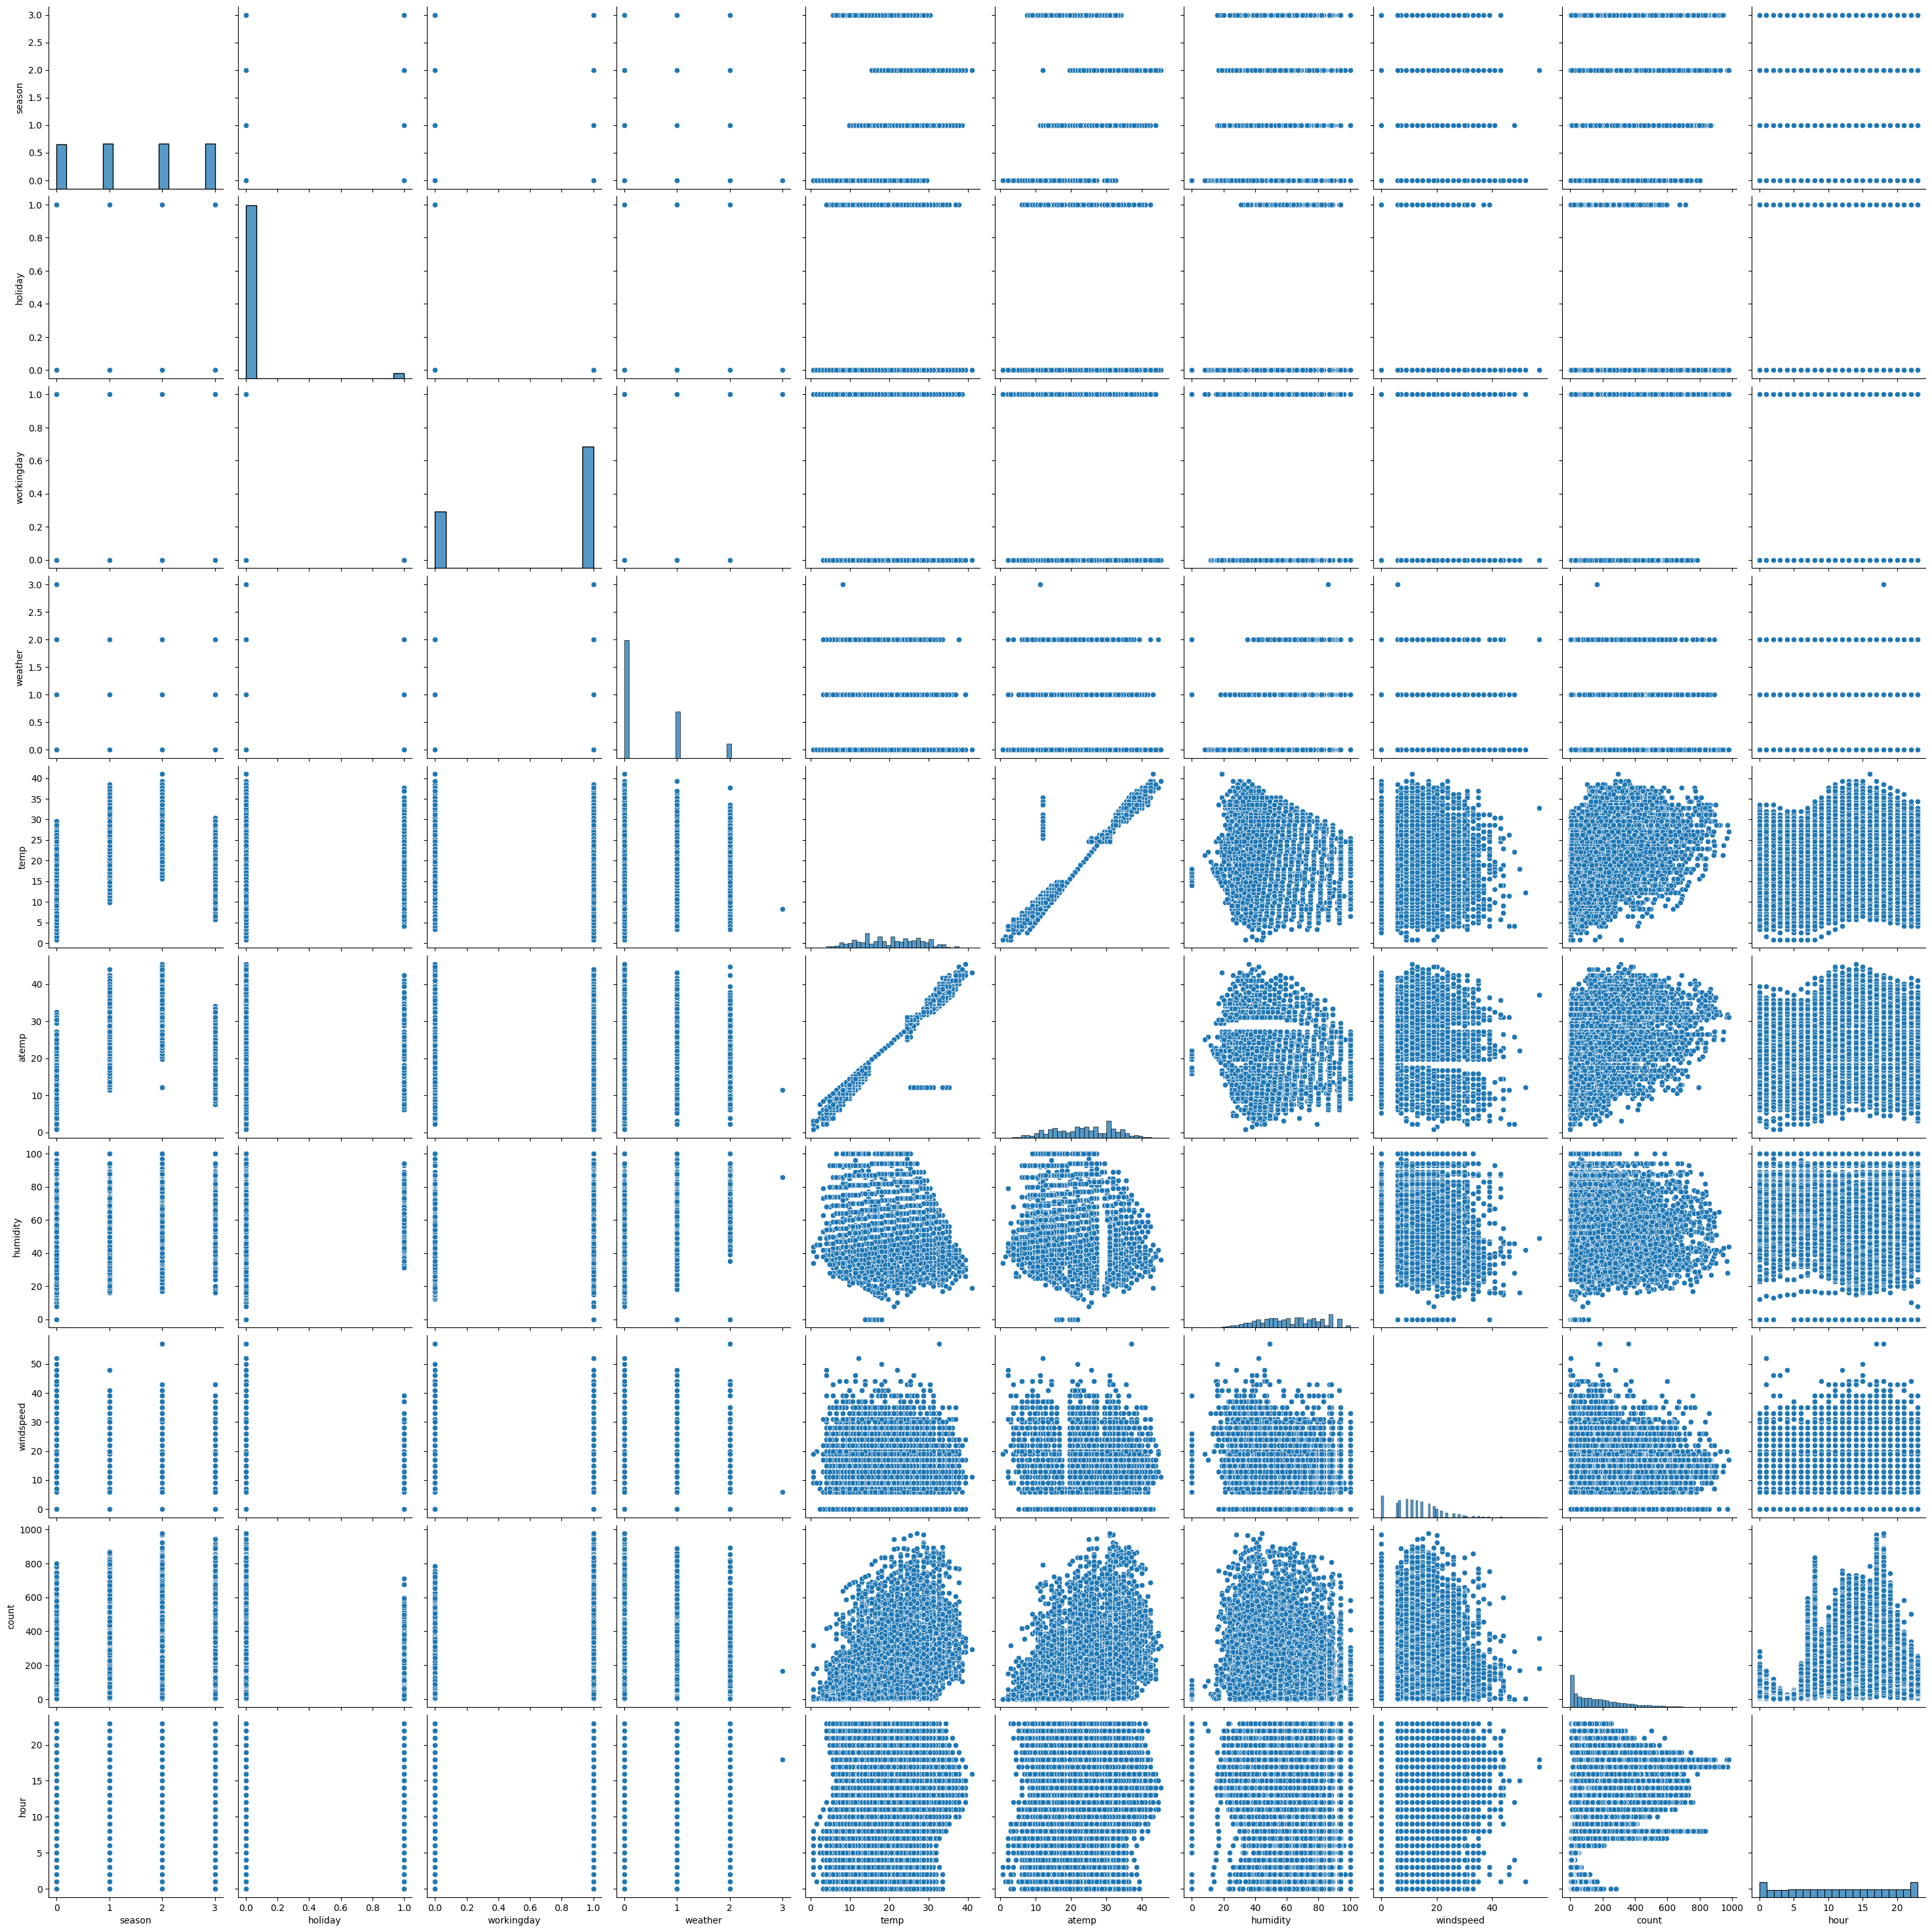

In [98]:
# correlation analysis
# plot sns pairplot including categorical variables
df_codes = df_train.copy()
for c in cat_cols:
    df_codes[c] = df_codes[c].astype('category').cat.codes
sns.pairplot(df_codes[df_codes.select_dtypes('number').columns], height=3)

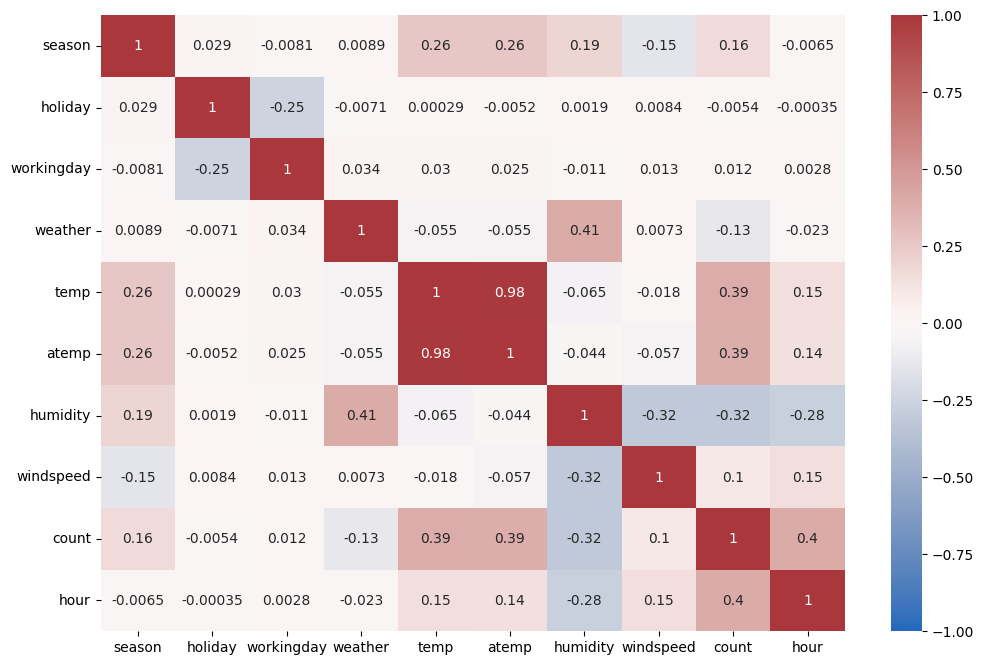

In [99]:
# correlation analysis
# plot correlation matrix against all plots
corr = df_codes.drop(columns="day").corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, vmin=-1, annot=True, vmax=1, center=0, cmap="vlag")
plt.show()

C:\Users\Valerio Pellicciari\AppData\Local\Temp\ipykernel_26700\3205496033.py:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  f'{c}_inv': 1.0 / s.replace(0),  # avoid +/-inf on zeros
C:\Users\Valerio Pellicciari\AppData\Local\Temp\ipykernel_26700\3205496033.py:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  f'{c}_inv': 1.0 / s.replace(0),  # avoid +/-inf on zeros


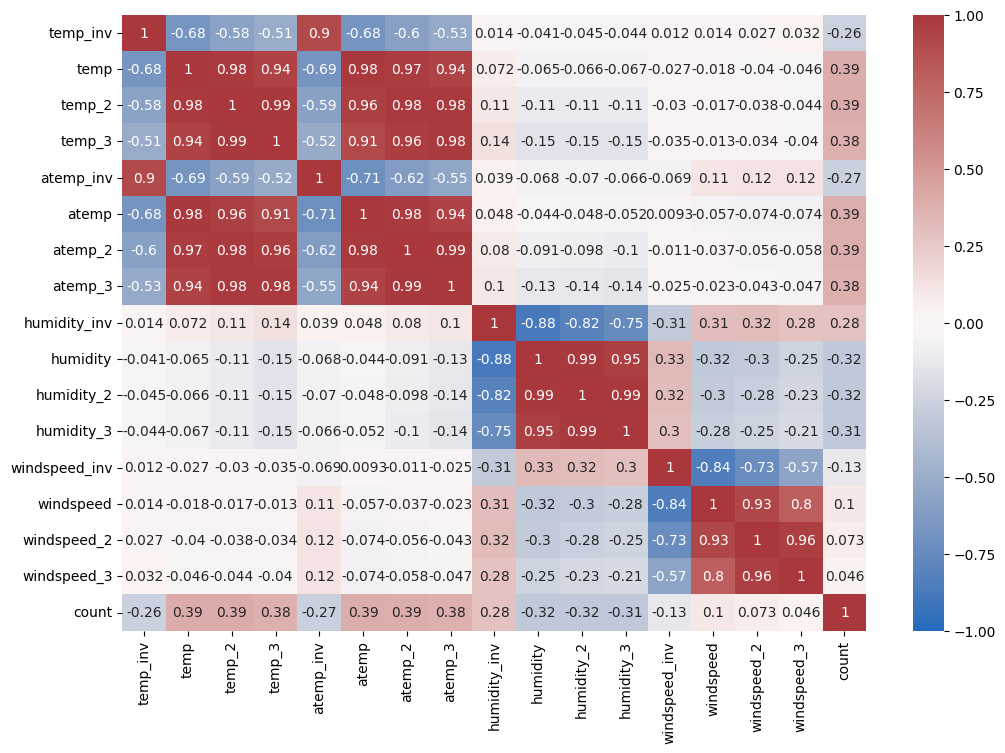

In [100]:
# Build polynomial features: 1/x, x, x^2, x^3
pieces = []
for c in num_cols:
    s = df_train[c]
    df_c = pd.DataFrame({
        f'{c}_inv': 1.0 / s.replace(0),  # avoid +/-inf on zeros
        f'{c}':     s,
        f'{c}_2':   s**2,
        f'{c}_3':   s**3,
    }, index=df_train.index)
    pieces.append(df_c)

poly_df = pd.concat(pieces, axis=1)
poly_df["count"] = df_train["count"]

# correlation analysis with expanded features
corr_poly = poly_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_poly, vmin=-1, annot=True, vmax=1, center=0, cmap="vlag")
plt.show()

In [101]:
# FE: drop cross-correlated feature temperature, only keep atemp
df_train.drop(columns=["temp"], inplace=True)
df_test.drop(columns=["temp"], inplace=True)
num_cols.remove("temp")

## 4. Refit Autogluon model

In [102]:
predictor = TabularPredictor(label="count", path = f"AutogluonModels/agmodelB").fit(
    train_data=df_train,
    time_limit=60,
    presets="best_quality"
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       7.39 GB / 31.67 GB (23.3%)
Disk Space Avail:   474.61 GB / 951.65 GB (49.9%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is use

In [103]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMXT_BAG_L1  -34.57002  root_mean_squared_error      16.363740  23.527019                16.36374          23.527019            1       True          1
1  WeightedEnsemble_L3  -34.57002  root_mean_squared_error      16.364741  23.532048                 0.00100           0.005029            3       True          3
2  WeightedEnsemble_L2  -34.57002  root_mean_squared_error      16.365761  23.533077                 0.00202           0.006058            2       True          2
Number of models trained: 3
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])            

c:\Users\Valerio Pellicciari\OneDrive - Mathwall Technologies Ltd\Desktop\Offline_Code\00_Personal\07_aws_mle_nano\bike_demand_prediction\.venv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-34.5700198526644),
  'WeightedEnsemble_L2': np.float64(-34.5700198526644),
  'WeightedEnsemble_L3': np.float64(-34.5700198526644)},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMXT_BAG_L1': ['LightGBMXT_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBMXT_BAG_L1': 23.527019262313843,
  'WeightedEnsemble_L2': 0.0060577392578125,
  'WeightedEnsemble_L3': 0.005028963088989258},
 'model_pred_times': {'LightGBMXT_BAG_L1': 16.36374020576477,
  'WeightedEnsemble_L2': 0.0020203590393066406,
  'WeightedEnsemble_L3': 0.0010004043579101562},
 'num_bag_folds': 8,
 'max_stack_level': 3,
 'model_hyperparams': {'LightGBMXT_BAG_L1': {'use_orig_features': True,
   'valid_stack

In [104]:
# make predictions on test dataset
predictions = predictor.predict(df_test)
predictions.head()

0    16.675276
1     5.467082
2     4.413031
3     3.136466
4     3.313131
Name: count, dtype: float32

In [105]:
#### NOTE: Kaggle will reject the submission if it contains negative numbers - we need to set everything to be > 0

# how many negative predictions?
print(f"number of negative predictions: {len(predictions[predictions<0])}")

# replace with zeros
predictions[predictions<0] = 0

number of negative predictions: 189


In [106]:
# save submission to csv
submission["count"] = predictions
submission.to_csv("submissions/submission_b.csv", index=False)

## 5. Refit Autogluon model with hyperparameter tuning

In [107]:
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config

In [108]:
nsl = [3,2,1,0]

for n in nsl:
    predictor = TabularPredictor(label="count", path = f"AutogluonModels/agmodelC").fit(
        train_data=df_train,
        num_stack_levels=n,
        time_limit=60,
        presets="best_quality",
        hyperparameters=get_hyperparameter_config("default"), 
        hyperparameter_tune_kwargs={"num_trials": 30, "searcher": "random"}
    )

    # make predictions on test dataset
    predictions = predictor.predict(df_test)
    predictions.head()

    # replace with zeros
    predictions[predictions<0] = 0

    # save submission to csv
    submission["count"] = predictions
    submission.to_csv(f"submissions/submission_tl_{str(n)}.csv", index=False)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.11.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          20
Memory Avail:       7.07 GB / 31.67 GB (22.3%)
Disk Space Avail:   474.63 GB / 951.65 GB (49.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up 

In [109]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  LightGBMLarge_BAG_L1 -34.255927  root_mean_squared_error       0.618829  14.744429                0.618829          14.744429            1       True          1
1   WeightedEnsemble_L2 -34.255927  root_mean_squared_error       0.620822  14.750426                0.001992           0.005997            2       True          2
Number of models trained: 2
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 2 | ['atemp', 'windspeed']
('int', [])                  : 2 | ['humidity', 'hour']
('int', ['bool'])            : 2

c:\Users\Valerio Pellicciari\OneDrive - Mathwall Technologies Ltd\Desktop\Offline_Code\00_Personal\07_aws_mle_nano\bike_demand_prediction\.venv\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge_BAG_L1': np.float64(-34.25592748599027),
  'WeightedEnsemble_L2': np.float64(-34.25592748599027)},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMLarge_BAG_L1': ['LightGBMLarge_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBMLarge_BAG_L1': 14.744428873062134,
  'WeightedEnsemble_L2': 0.0059969425201416016},
 'model_pred_times': {'LightGBMLarge_BAG_L1': 0.6188294887542725,
  'WeightedEnsemble_L2': 0.001992464065551758},
 'num_bag_folds': 8,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBMLarge_BAG_L1': {'use_orig_features': True,
   'valid_stacker': True,
   'max_base_models': 0,
   'max_base_models_per_type': 'auto',
   'save_bag_folds': True,
   'stratify': 'auto',
   'bin': 'auto',
   'n_bins': None},
  'WeightedEnsemble_L2': {'use_orig_features': False,
   'vali

## 6: Write a Report
### Creating plots and table for report

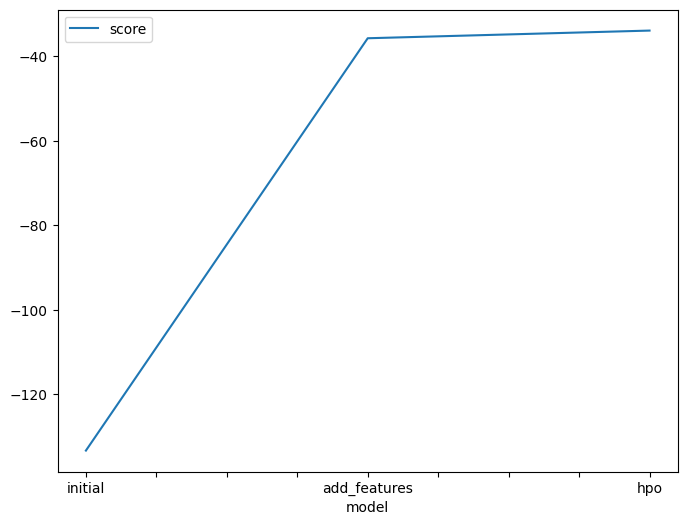

In [110]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-133.287222, -35.713615, -33.899264]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

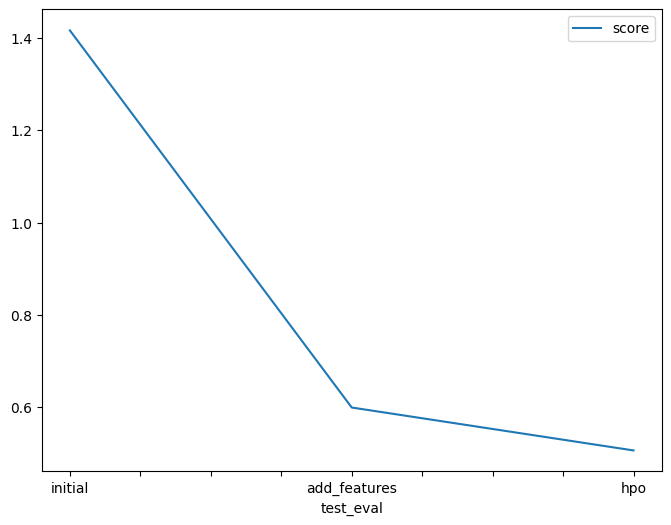

In [111]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.41644, 0.59952, 0.50653]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')